In [10]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 70.9/70.9 MB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as  mae
from sklearn.metrics import mean_squared_error as mse
import pickle
from itertools import combinations
from joblib import dump
import xgboost as xgb

In [2]:
df = pd.read_csv('PacificaClean.csv')

In [3]:
df

,CTDTMP [ITS-90],OXYGEN [UMOL/KG],TCARBN [UMOL/KG],PHSPHT [UMOL/KG],SILCAT [UMOL/KG],NITRAT [UMOL/KG],PH
0,4.547,119.10,2286.68,2.824,70.516,37.126,7.552423
1,4.533,100.64,2290.58,2.744,71.046,38.908,7.518387
2,4.536,130.80,2282.86,2.532,62.012,35.762,7.514944
3,4.536,130.80,2282.86,2.532,62.012,35.762,7.514944
4,4.536,130.80,2282.86,2.532,62.012,35.762,7.514944
...,...,...,...,...,...,...,...
277318,3.494,67.60,2290.04,2.880,120.580,41.750,7.565329
277319,2.898,82.60,2325.14,2.780,129.890,40.660,7.508111
277320,2.621,99.60,2342.30,2.770,133.730,40.110,7.487689
277321,2.339,115.70,2347.40,2.710,136.900,39.560,7.536210


In [29]:
nouveaux_noms = {
    'CTDTMP [ITS-90]': 'temp',
    'OXYGEN [UMOL/KG]': 'oxygen',
    'TCARBN [UMOL/KG]': 'tcarbn',
    'PHSPHT [UMOL/KG]': 'phspht',
    'SILCAT [UMOL/KG]': 'silcat',
    'NITRAT [UMOL/KG]': 'nitrat',
    # Ajouter les autres colonnes et leurs nouveaux noms
}

# Renommer les colonnes dans le DataFrame
df.rename(columns=nouveaux_noms, inplace=True)

In [30]:
df

,temp,oxygen,tcarbn,phspht,silcat,nitrat,PH
0,4.547,119.10,2286.68,2.824,70.516,37.126,7.552423
1,4.533,100.64,2290.58,2.744,71.046,38.908,7.518387
2,4.536,130.80,2282.86,2.532,62.012,35.762,7.514944
3,4.536,130.80,2282.86,2.532,62.012,35.762,7.514944
4,4.536,130.80,2282.86,2.532,62.012,35.762,7.514944
...,...,...,...,...,...,...,...
277318,3.494,67.60,2290.04,2.880,120.580,41.750,7.565329
277319,2.898,82.60,2325.14,2.780,129.890,40.660,7.508111
277320,2.621,99.60,2342.30,2.770,133.730,40.110,7.487689
277321,2.339,115.70,2347.40,2.710,136.900,39.560,7.536210


In [31]:
X=df.drop('PH', axis=1)
y=df['PH']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
pipeline=Pipeline([
       ('scaler', StandardScaler()),
       ('XGB Regressor', xgb.XGBRegressor(verbosity=0))
   
])

In [26]:
para = { 
    'XGB Regressor__n_estimators': [100, 200, 300],

    'XGB Regressor__max_depth': [3, 4, 5],
    'XGB Regressor__learning_rate': [0.1, 0.2, 0.3]
}

In [27]:
grid_search = GridSearchCV(pipeline, para, cv= 5,n_jobs=-1)

In [28]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('XGB Regressor',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     early_stopping_rounds=None,
                                                     enable_categorical=False,
                                                     eval_metric=None,
                                                     feature_types=None,
                                                     gamma=None, gpu_id=None,
                                      

In [34]:
best_params = grid_search.best_params_

In [35]:
print("Meilleurs paramètres:", best_params)

Meilleurs paramètres: {'XGB Regressor__learning_rate': 0.3, 'XGB Regressor__max_depth': 5, 'XGB Regressor__n_estimators': 300}


In [36]:
best_pipeline = grid_search.best_estimator_

In [37]:
best_pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB Regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.3,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=300,
                              n_jobs=None, 

In [38]:
y_pred= best_pipeline.predict(X_test)

In [39]:
print("Meilleur score de validation croisée :", grid_search.best_score_)

Meilleur score de validation croisée : 0.8103575818952983


In [40]:
rmse =mse(y_test,y_pred,squared=False)

In [41]:
print("Rmse =",rmse)

Rmse = 0.07700353961817982


In [42]:
with open('XGBOOST_all_features.pkl', 'wb') as file:
    dump(best_pipeline, file)

### Entrainement sur cinq variables 

In [43]:
temp=['temp']
oxyg=['oxygen']
tCarb=['tcarbn']
silicate=['silcat']
phosphate=['phspht']
nitrate=['nitrat']
#Création des combinaisons de cinq variables
comb5Var = combinations([temp, oxyg,tCarb, silicate,phosphate,nitrate],5)
#Création des combinaisons de quatre variables
comb4Var = combinations([temp, oxyg,tCarb, silicate,phosphate,nitrate],4)
#Création des combinaisons de trois variables
comb3Var = combinations([temp, oxyg,tCarb, silicate,phosphate,nitrate],3)
#Création des combinaisons de deux variables
comb2Var = combinations([temp, oxyg,tCarb, silicate,phosphate,nitrate],2)
#Création des combinaisons de un variable
comb1Var = combinations([temp, oxyg,tCarb, silicate,phosphate,nitrate],1)

In [44]:
comb5v=list(comb5Var)
comb4v=list(comb4Var)
comb3v=list(comb3Var)
comb2v=list(comb2Var)
comb1v=list(comb1Var)

In [49]:
R2_5v={}
Rmse_5v={}
for a in range(0,len(comb5v)):
    xtr=pd.DataFrame()
    xts=pd.DataFrame()
    for i in comb5v[a] :
        for x in i:
            xtr.insert(0,x,X_train[x])
            xts.insert(0,x,X_test[x])
            
    grids = GridSearchCV(pipeline,para,cv=5,n_jobs=-1)
    grids.fit(xtr,y_train)
    modelxgb=grids.best_estimator_
    y_pred=modelxgb.predict(xts)
    scoreR2=r2_score(y_test,y_pred)
    scoreRmse = mse(y_test,y_pred,squared=False)
    var=''
    for col in xtr.columns:
        var+=col+'_'
    R2_5v[var]=scoreR2
    Rmse_5v[var]=scoreRmse
    print("R2",scoreR2)
    print("Rmse",scoreRmse)
    #joblib.dump(modelrfc,open('rf_5v_'+var,"wb"))
    dump(modelxgb,open('XGBoost_5v_'+var,"wb"))
    print("------")

R2 0.811394014004497
Rmse 0.07784677739533606
------
R2 0.8088686125424833
Rmse 0.07836622178790803
------
R2 0.8056619719570539
Rmse 0.07902086848961552
------
R2 0.7653334605314127
Rmse 0.08683373608226715
------
R2 0.8076893371963393
Rmse 0.0786076087275118
------
R2 0.807896971829026
Rmse 0.07856516160143118
------


In [50]:
R2_5v

{'phspht_silcat_tcarbn_oxygen_temp_': 0.811394014004497,
 'nitrat_silcat_tcarbn_oxygen_temp_': 0.8088686125424833,
 'nitrat_phspht_tcarbn_oxygen_temp_': 0.8056619719570539,
 'nitrat_phspht_silcat_oxygen_temp_': 0.7653334605314127,
 'nitrat_phspht_silcat_tcarbn_temp_': 0.8076893371963393,
 'nitrat_phspht_silcat_tcarbn_oxygen_': 0.807896971829026}

In [53]:
 Rmse_5v

{'phspht_silcat_tcarbn_oxygen_temp_': 0.07784677739533606,
 'nitrat_silcat_tcarbn_oxygen_temp_': 0.07836622178790803,
 'nitrat_phspht_tcarbn_oxygen_temp_': 0.07902086848961552,
 'nitrat_phspht_silcat_oxygen_temp_': 0.08683373608226715,
 'nitrat_phspht_silcat_tcarbn_temp_': 0.0786076087275118,
 'nitrat_phspht_silcat_tcarbn_oxygen_': 0.07856516160143118}

In [54]:
Variables = list(R2_5v.keys())
ScoresR2 = list(R2_5v.values())
ScoreRmse=list( Rmse_5v.values())
tmp = max(ScoresR2)
index = ScoresR2.index(tmp)

In [55]:

print("La meilleur combinaison pour quatre variables est:",Variables[index])
print("R2",ScoresR2[index])
print("Rmse",ScoreRmse[index])

La meilleur combinaison pour quatre variables est: phspht_silcat_tcarbn_oxygen_temp_
R2 0.811394014004497
Rmse 0.07784677739533606


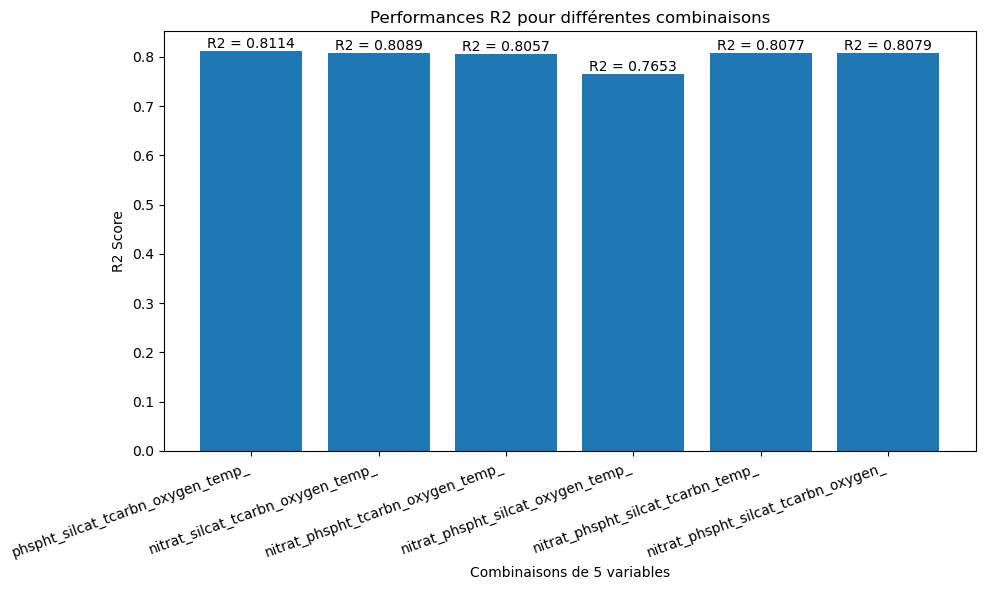

In [90]:
plt.figure(figsize=(10, 6))
plt.bar(Variables, ScoresR2)
plt.xlabel('Combinaisons de 5 variables')
plt.ylabel('R2 Score')
plt.title('Performances R2 pour différentes combinaisons')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
for i, score in enumerate(ScoresR2):
    plt.text(i, score, f'R2 = {score:.4f}', ha='center', va='bottom')
plt.show()


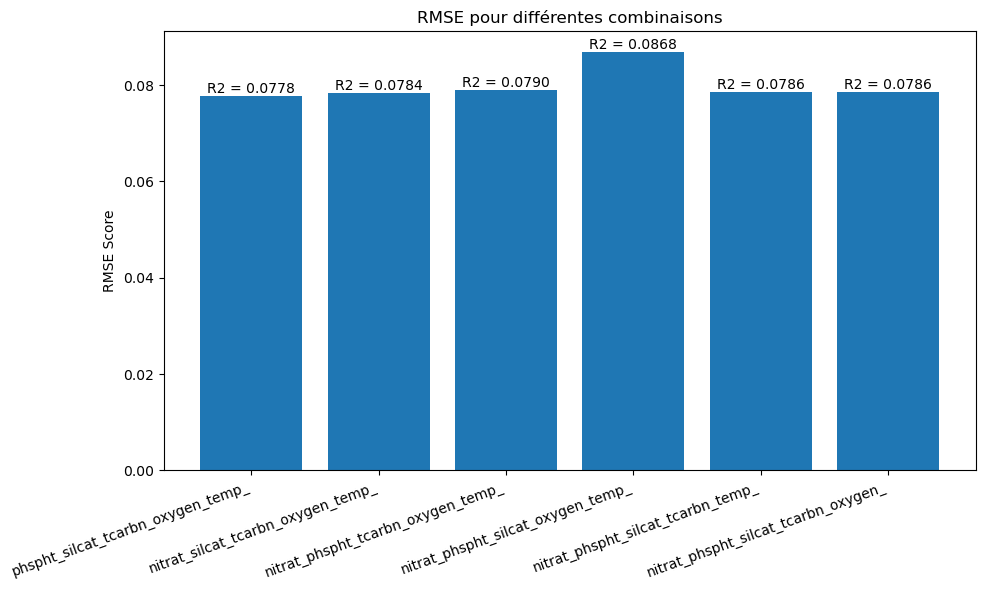

In [89]:
plt.figure(figsize=(10, 6))
plt.bar(Variables, ScoreRmse)
plt.ylabel('RMSE Score')
plt.title('RMSE pour différentes combinaisons')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
for i, score in enumerate(ScoreRmse):
    plt.text(i, score, f'Rmse = {score:.4f}', ha='center', va='bottom')
plt.show()

### Entrainement sur quatre variables

In [96]:
pipeline=Pipeline([
       ('scaler', StandardScaler()),
       ('XGB Regressor', xgb.XGBRegressor(verbosity=0))
   
])

In [98]:
para = { 
    'XGB Regressor__n_estimators': [100, 200, 300],
    'XGB Regressor__max_depth': [3, 4, 5],
    'XGB Regressor__learning_rate': [0.1, 0.2, 0.3]
}

In [99]:
R2_4v={}
Rmse_4v={}
for a in range(0,len(comb4v)):
    xtr=pd.DataFrame()
    xts=pd.DataFrame()
    for i in comb4v[a] :
        for x in i:
            xtr.insert(0,x,X_train[x])
            xts.insert(0,x,X_test[x])
            
    grids = GridSearchCV(pipeline,para,cv=5,n_jobs=-1)
    grids.fit(xtr,y_train)
    modelxgb=grids.best_estimator_
    y_pred=modelxgb.predict(xts)
    scoreR2=r2_score(y_test,y_pred)
    scoreRmse = mse(y_test,y_pred,squared=False)
    var=''
    for col in xtr.columns:
        var+=col+'_'
    R2_4v[var]=scoreR2
    Rmse_4v[var]=scoreRmse
    print("R2",scoreR2)
    print("Rmse",scoreRmse)
    dump(modelxgb,open('XGBoost_4v_'+var,"wb"))
    print("------")

R2 0.8026543327634306
Rmse 0.07962999723507042
------
R2 0.7976493563732724
Rmse 0.08063344179025407
------
R2 0.7969404498129246
Rmse 0.08077456216920893
------
R2 0.7588223521467555
Rmse 0.08803014766890631
------
R2 0.7598430575955789
Rmse 0.08784367076673767
------
R2 0.7557515915772853
Rmse 0.08858879083519446
------
R2 0.8032955310310802
Rmse 0.07950052857658416
------
R2 0.802137454539035
Rmse 0.07973421056026889
------
R2 0.7975532343249139
Rmse 0.08065259105320735
------
R2 0.759805831730084
Rmse 0.08785047866895712
------
R2 0.8022510857999148
Rmse 0.0797113118351654
------
R2 0.8020822341840202
Rmse 0.07974533607229481
------
R2 0.7874254990377876
Rmse 0.08264536210529469
------
R2 0.7603559522123797
Rmse 0.08774981833325592
------
R2 0.7923632470380678
Rmse 0.08167986609563796
------


In [100]:
R2_4v

{'silcat_tcarbn_oxygen_temp_': 0.8026543327634306,
 'phspht_tcarbn_oxygen_temp_': 0.7976493563732724,
 'nitrat_tcarbn_oxygen_temp_': 0.7969404498129246,
 'phspht_silcat_oxygen_temp_': 0.7588223521467555,
 'nitrat_silcat_oxygen_temp_': 0.7598430575955789,
 'nitrat_phspht_oxygen_temp_': 0.7557515915772853,
 'phspht_silcat_tcarbn_temp_': 0.8032955310310802,
 'nitrat_silcat_tcarbn_temp_': 0.802137454539035,
 'nitrat_phspht_tcarbn_temp_': 0.7975532343249139,
 'nitrat_phspht_silcat_temp_': 0.759805831730084,
 'phspht_silcat_tcarbn_oxygen_': 0.8022510857999148,
 'nitrat_silcat_tcarbn_oxygen_': 0.8020822341840202,
 'nitrat_phspht_tcarbn_oxygen_': 0.7874254990377876,
 'nitrat_phspht_silcat_oxygen_': 0.7603559522123797,
 'nitrat_phspht_silcat_tcarbn_': 0.7923632470380678}

In [101]:
Rmse_4v

{'silcat_tcarbn_oxygen_temp_': 0.07962999723507042,
 'phspht_tcarbn_oxygen_temp_': 0.08063344179025407,
 'nitrat_tcarbn_oxygen_temp_': 0.08077456216920893,
 'phspht_silcat_oxygen_temp_': 0.08803014766890631,
 'nitrat_silcat_oxygen_temp_': 0.08784367076673767,
 'nitrat_phspht_oxygen_temp_': 0.08858879083519446,
 'phspht_silcat_tcarbn_temp_': 0.07950052857658416,
 'nitrat_silcat_tcarbn_temp_': 0.07973421056026889,
 'nitrat_phspht_tcarbn_temp_': 0.08065259105320735,
 'nitrat_phspht_silcat_temp_': 0.08785047866895712,
 'phspht_silcat_tcarbn_oxygen_': 0.0797113118351654,
 'nitrat_silcat_tcarbn_oxygen_': 0.07974533607229481,
 'nitrat_phspht_tcarbn_oxygen_': 0.08264536210529469,
 'nitrat_phspht_silcat_oxygen_': 0.08774981833325592,
 'nitrat_phspht_silcat_tcarbn_': 0.08167986609563796}

In [104]:
Variables = list(R2_4v.keys())
ScoresR2 = list(R2_4v.values())
ScoreRmse=list( Rmse_4v.values())
tmp = max(ScoresR2)
index = ScoresR2.index(tmp)

In [105]:
print("La meilleur combinaison pour quatre variables est:",Variables[index])
print("R2",ScoresR2[index])
print("Rmse",ScoreRmse[index])

La meilleur combinaison pour quatre variables est: phspht_silcat_tcarbn_temp_
R2 0.8032955310310802
Rmse 0.07950052857658416


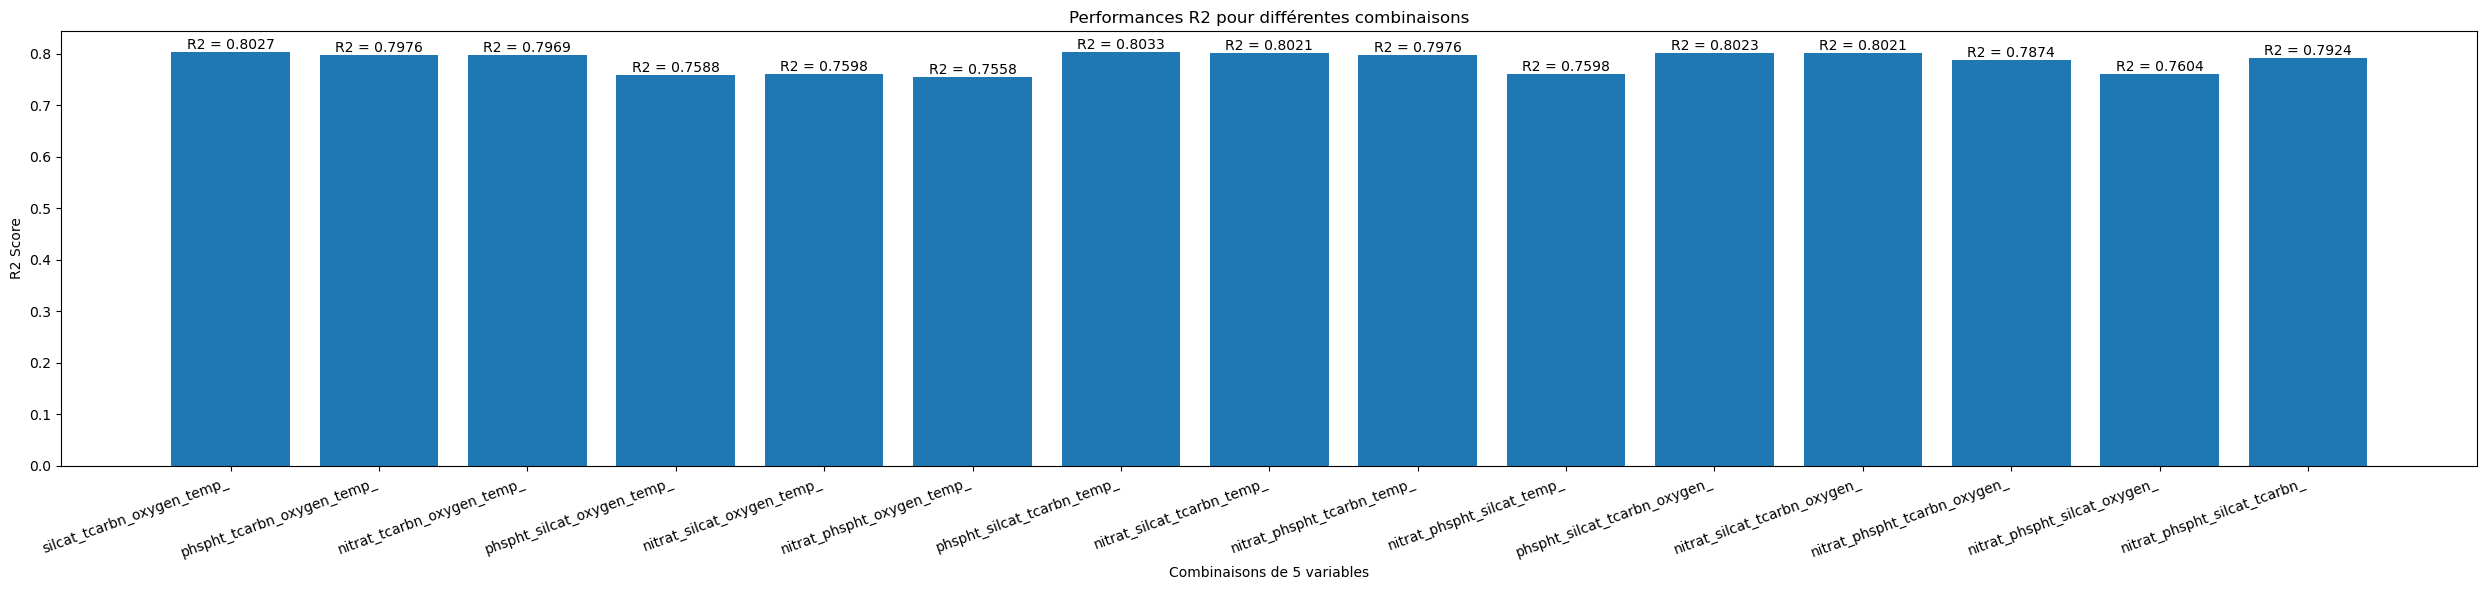

In [112]:
plt.figure(figsize=(25, 6))
plt.bar(Variables, ScoresR2)
plt.ylabel('R2 Score')
plt.title('Performances R2 pour différentes combinaisons')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
for i, score in enumerate(ScoresR2):
    plt.text(i, score, f'R2 = {score:.4f}', ha='center', va='bottom')
plt.show()

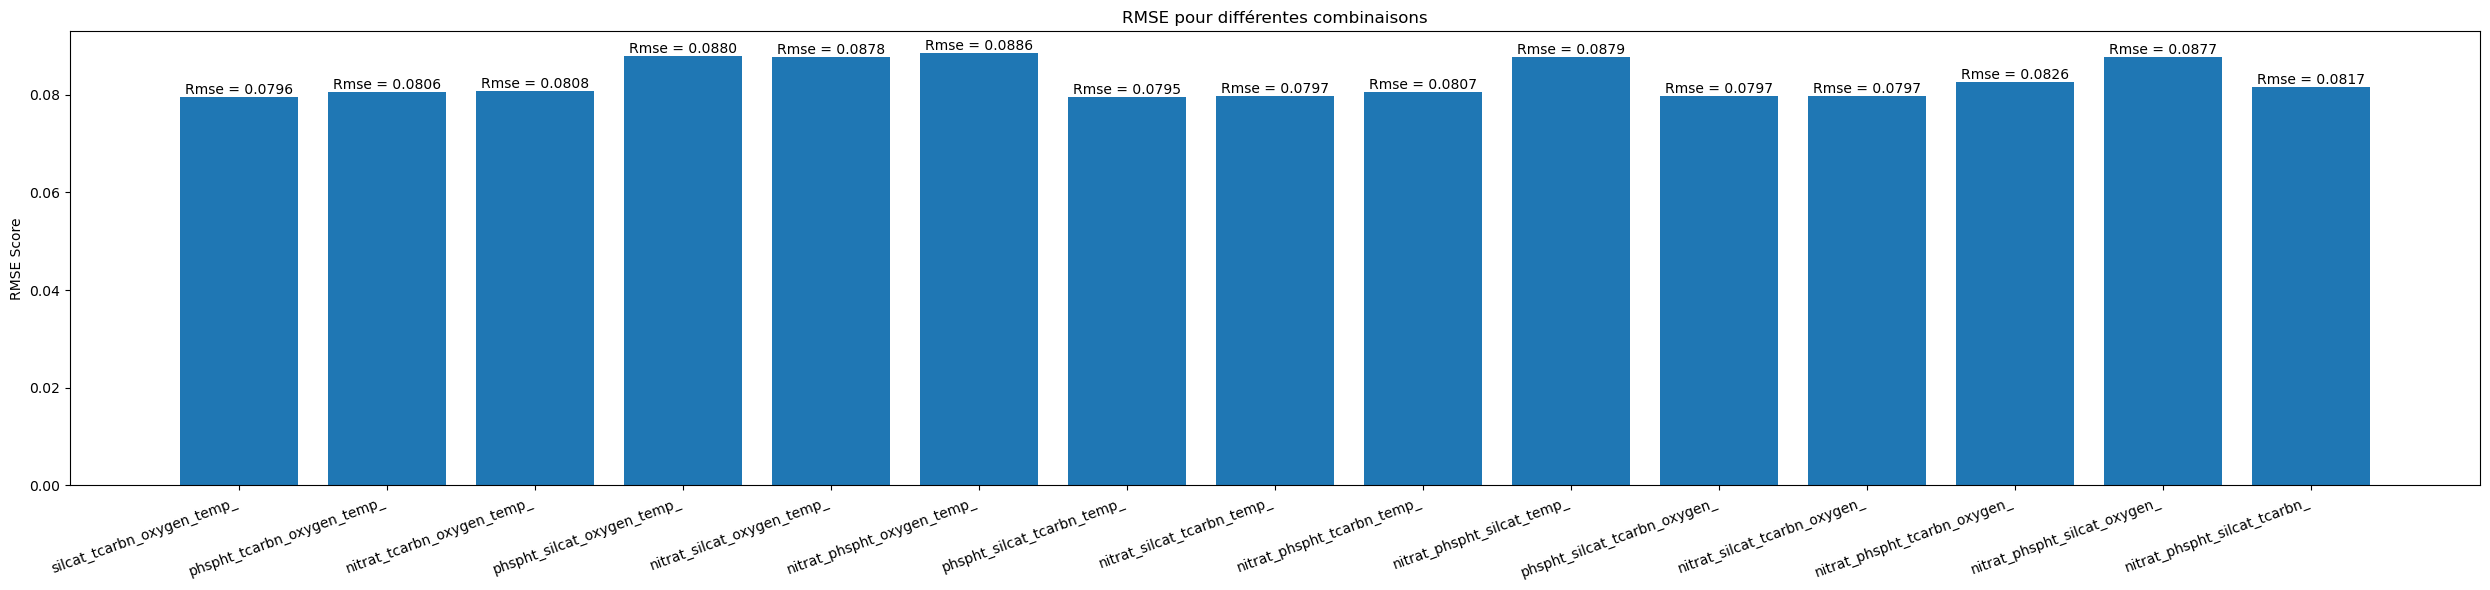

In [110]:
plt.figure(figsize=(25, 6))
plt.bar(Variables, ScoreRmse)
plt.ylabel('RMSE Score')
plt.title('RMSE pour différentes combinaisons')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
for i, score in enumerate(ScoreRmse):
    plt.text(i, score, f'Rmse = {score:.4f}', ha='center', va='bottom')
plt.show()

### Entrainement sur trois variables 

In [113]:
R2_3v={}
Rmse_3v={}
for a in range(0,len(comb3v)):
    xtr=pd.DataFrame()
    xts=pd.DataFrame()
    for i in comb3v[a] :
        for x in i:
            xtr.insert(0,x,X_train[x])
            xts.insert(0,x,X_test[x])
            
    grids = GridSearchCV(pipeline,para,cv=5,n_jobs=-1)
    grids.fit(xtr,y_train)
    modelxgb=grids.best_estimator_
    y_pred=modelxgb.predict(xts)
    scoreR2=r2_score(y_test,y_pred)
    scoreRmse = mse(y_test,y_pred,squared=False)
    var=''
    for col in xtr.columns:
        var+=col+'_'
    R2_3v[var]=scoreR2
    Rmse_3v[var]=scoreRmse
    print("R2",scoreR2)
    print("Rmse",scoreRmse)
    pickle.dump(modelxgb,open('XGBoost_3v_'+var,"wb"))
    print("------")

R2 0.7885314217699703
Rmse 0.0824300997590849
------
R2 0.7485145078620085
Rmse 0.08989165387044232
------
R2 0.7464294758817982
Rmse 0.09026352441203211
------
R2 0.747759856334598
Rmse 0.09002642518214429
------
R2 0.7873334928553524
Rmse 0.08266324539240434
------


C:\ProgramData\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


R2 0.788786027258315
Rmse 0.08238046241614656
------
R2 0.787237320079671
Rmse 0.08268193440760778
------
R2 0.7477498422228657
Rmse 0.09002821222071757
------
R2 0.7503990354516272
Rmse 0.08955421520850049
------
R2 0.746939877532496
Rmse 0.09017263478909847
------
R2 0.7927712981853217
Rmse 0.08159956731988434
------
R2 0.7791481163660602
Rmse 0.08423904924398852
------
R2 0.7792064326668594
Rmse 0.0842279267804039
------
R2 0.751202556966858
Rmse 0.08940995145321617
------
R2 0.7534119078448338
Rmse 0.08901208069843726
------
R2 0.7469214579115815
Rmse 0.09017591645100266
------
R2 0.7820362477520686
Rmse 0.08368642980744292
------
R2 0.7823486104277858
Rmse 0.0836264430228481
------
R2 0.7601361713827577
Rmse 0.08779004739021737
------
R2 0.7438735097326881
Rmse 0.09071730751764197
------


In [114]:
R2_3v

{'tcarbn_oxygen_temp_': 0.7885314217699703,
 'silcat_oxygen_temp_': 0.7485145078620085,
 'phspht_oxygen_temp_': 0.7464294758817982,
 'nitrat_oxygen_temp_': 0.747759856334598,
 'silcat_tcarbn_temp_': 0.7873334928553524,
 'phspht_tcarbn_temp_': 0.788786027258315,
 'nitrat_tcarbn_temp_': 0.787237320079671,
 'phspht_silcat_temp_': 0.7477498422228657,
 'nitrat_silcat_temp_': 0.7503990354516272,
 'nitrat_phspht_temp_': 0.746939877532496,
 'silcat_tcarbn_oxygen_': 0.7927712981853217,
 'phspht_tcarbn_oxygen_': 0.7791481163660602,
 'nitrat_tcarbn_oxygen_': 0.7792064326668594,
 'phspht_silcat_oxygen_': 0.751202556966858,
 'nitrat_silcat_oxygen_': 0.7534119078448338,
 'nitrat_phspht_oxygen_': 0.7469214579115815,
 'phspht_silcat_tcarbn_': 0.7820362477520686,
 'nitrat_silcat_tcarbn_': 0.7823486104277858,
 'nitrat_phspht_tcarbn_': 0.7601361713827577,
 'nitrat_phspht_silcat_': 0.7438735097326881}

In [115]:
Rmse_3v

{'tcarbn_oxygen_temp_': 0.0824300997590849,
 'silcat_oxygen_temp_': 0.08989165387044232,
 'phspht_oxygen_temp_': 0.09026352441203211,
 'nitrat_oxygen_temp_': 0.09002642518214429,
 'silcat_tcarbn_temp_': 0.08266324539240434,
 'phspht_tcarbn_temp_': 0.08238046241614656,
 'nitrat_tcarbn_temp_': 0.08268193440760778,
 'phspht_silcat_temp_': 0.09002821222071757,
 'nitrat_silcat_temp_': 0.08955421520850049,
 'nitrat_phspht_temp_': 0.09017263478909847,
 'silcat_tcarbn_oxygen_': 0.08159956731988434,
 'phspht_tcarbn_oxygen_': 0.08423904924398852,
 'nitrat_tcarbn_oxygen_': 0.0842279267804039,
 'phspht_silcat_oxygen_': 0.08940995145321617,
 'nitrat_silcat_oxygen_': 0.08901208069843726,
 'nitrat_phspht_oxygen_': 0.09017591645100266,
 'phspht_silcat_tcarbn_': 0.08368642980744292,
 'nitrat_silcat_tcarbn_': 0.0836264430228481,
 'nitrat_phspht_tcarbn_': 0.08779004739021737,
 'nitrat_phspht_silcat_': 0.09071730751764197}

In [116]:
Variables = list(R2_3v.keys())
ScoresR2 = list(R2_3v.values())
ScoreRmse=list( Rmse_3v.values())
tmp = max(ScoresR2)
index = ScoresR2.index(tmp)

In [117]:
print("La meilleur combinaison pour quatre variables est:",Variables[index])
print("R2",ScoresR2[index])
print("Rmse",ScoreRmse[index])

La meilleur combinaison pour quatre variables est: silcat_tcarbn_oxygen_
R2 0.7927712981853217
Rmse 0.08159956731988434


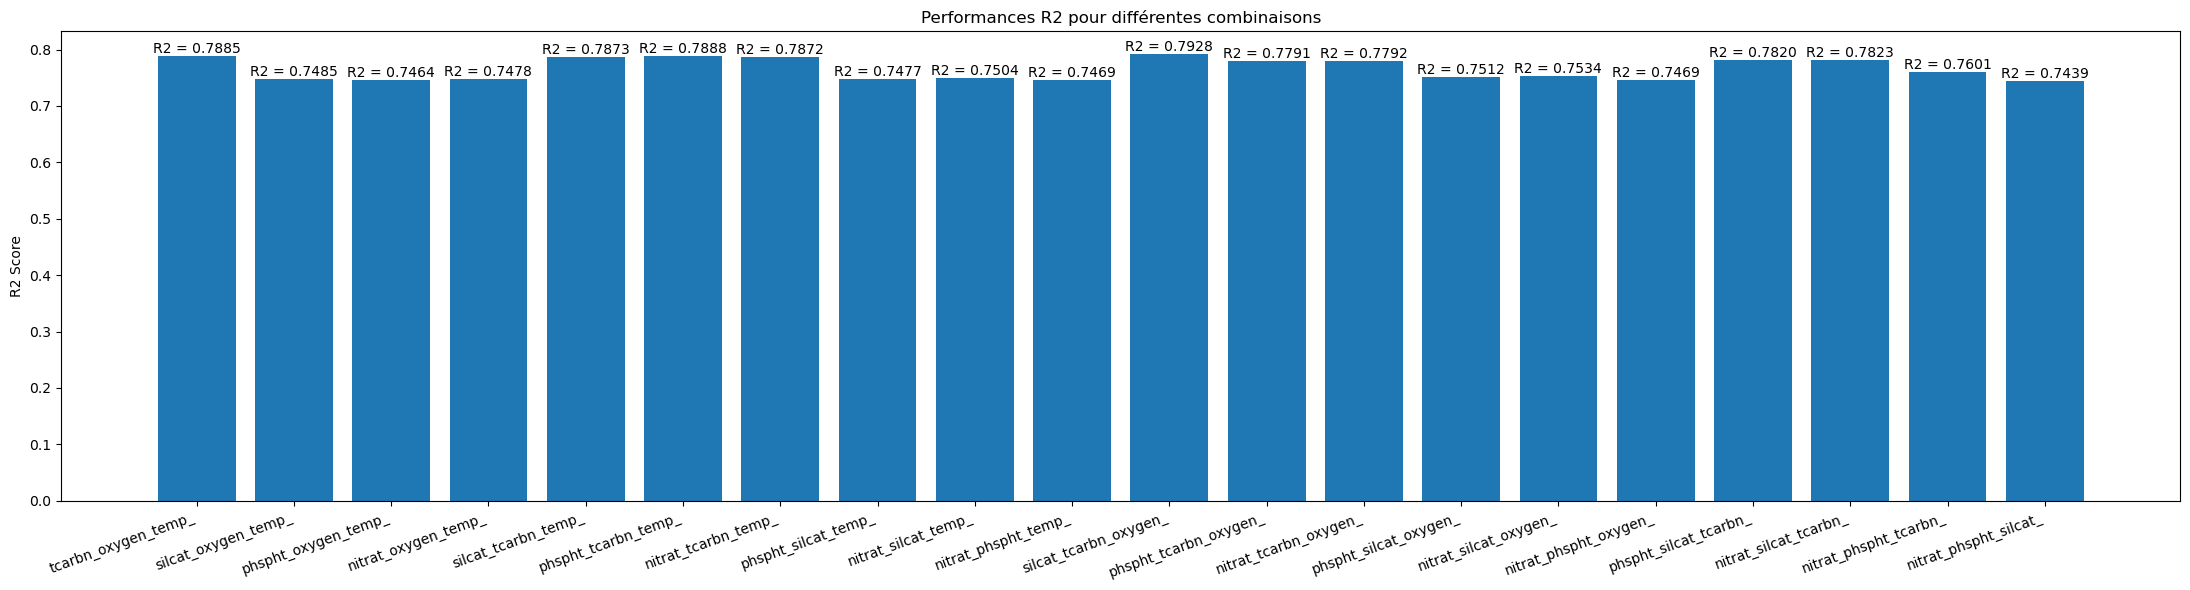

In [122]:
plt.figure(figsize=(22, 6))
plt.bar(Variables, ScoresR2)
plt.ylabel('R2 Score')
plt.title('Performances R2 pour différentes combinaisons')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
for i, score in enumerate(ScoresR2):
    plt.text(i, score, f'R2 = {score:.4f}', ha='center', va='bottom')
plt.show()

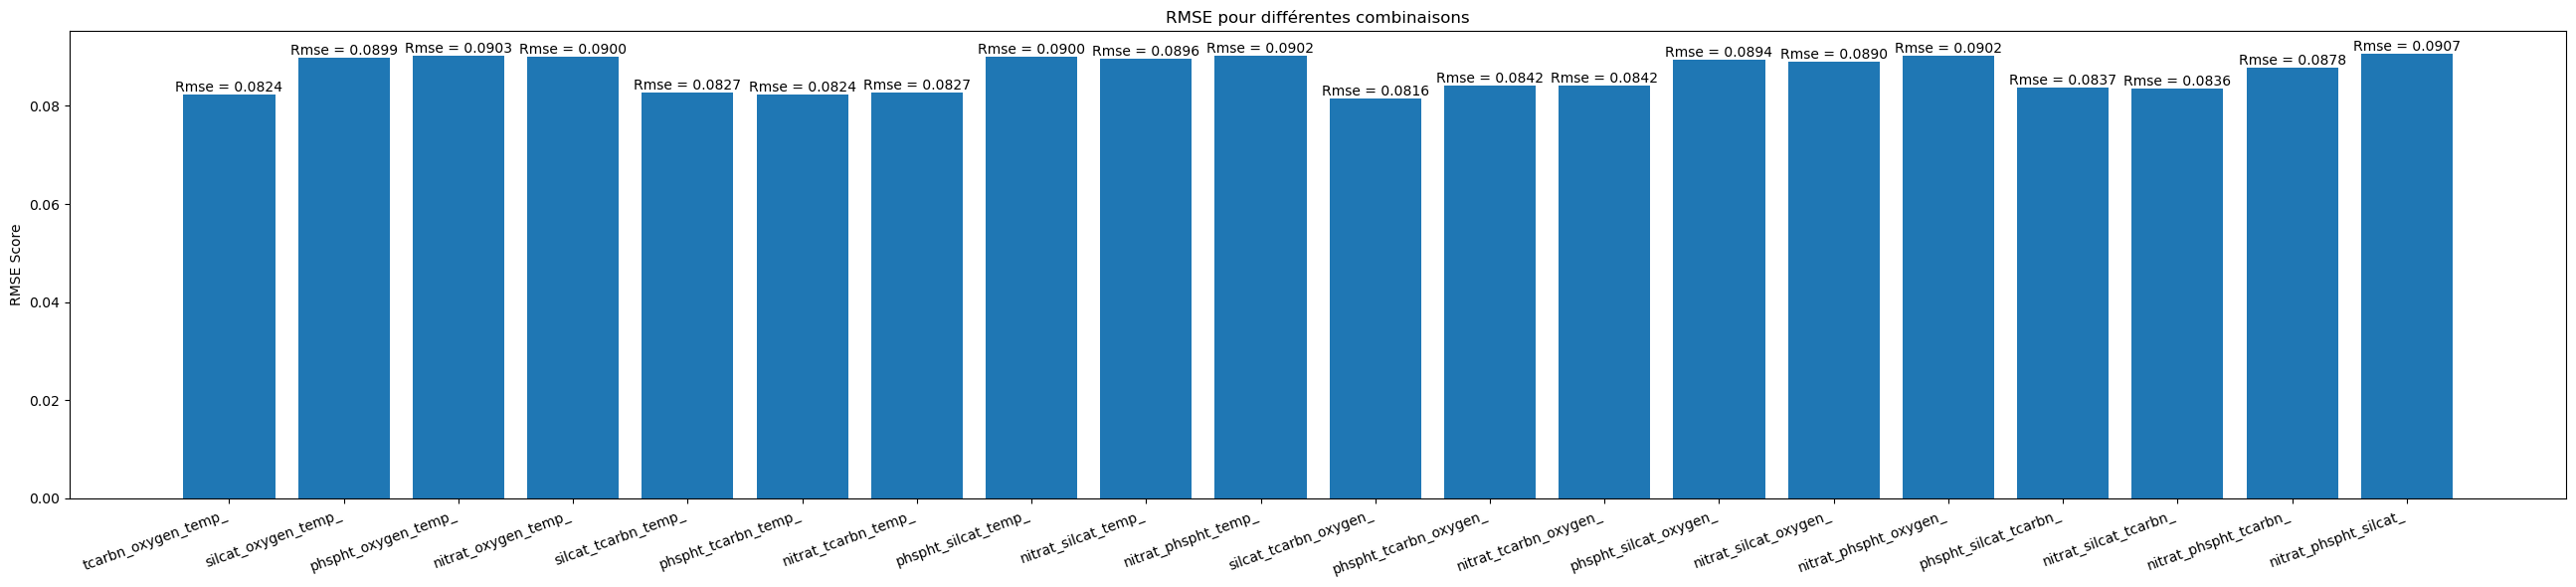

In [124]:
plt.figure(figsize=(26, 6))
plt.bar(Variables, ScoreRmse)
plt.ylabel('RMSE Score')
plt.title('RMSE pour différentes combinaisons')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
for i, score in enumerate(ScoreRmse):
    plt.text(i, score, f'Rmse = {score:.4f}', ha='center', va='bottom')
plt.show()

### Entrainement sur deux variables 

In [ ]:
R2_2v={}
Rmse_2v={}
for a in range(0,len(comb2v)):
    xtr=pd.DataFrame()
    xts=pd.DataFrame()
    for i in comb2v[a] :
        for x in i:
            xtr.insert(0,x,X_train[x])
            xts.insert(0,x,X_test[x])
            
    grids = GridSearchCV(pipeline,para,cv=5,n_jobs=-1)
    grids.fit(xtr,y_train)
    modelxgb=grids.best_estimator_
    y_pred=modelxgb.predict(xts)
    scoreR2=r2_score(y_test,y_pred)
    scoreRmse = mse(y_test,y_pred,squared=False)
    var=''
    for col in xtr.columns:
        var+=col+'_'
    R2_2v[var]=scoreR2
    Rmse_2v[var]=scoreRmse
    print("R2",scoreR2)
    print("Rmse",scoreRmse)
    #joblib.dump(modelrfc,open('rf_5v_'+var,"wb"))
    dump(modelxgb,open('XGBoost_2v_'+var,"wb"))
    print("------")

In [ ]:
R2_2v

In [ ]:
Rmse_2v

In [ ]:
Variables = list(R2_5v.keys())
ScoresR2 = list(R2_5v.values())
ScoreRmse=list( Rmse_5v.values())
tmp = max(ScoresR2)
index = ScoresR2.index(tmp)

In [ ]:
print("La meilleur combinaison pour quatre variables est:",Variables[index])
print("R2",ScoresR2[index])
print("Rmse",ScoreRmse[index])

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(Variables, ScoresR2)
plt.xlabel('Combinaisons de 5 variables')
plt.ylabel('R2 Score')
plt.title('Performances R2 pour différentes combinaisons')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
for i, score in enumerate(ScoresR2):
    plt.text(i, score, f'R2 = {score:.4f}', ha='center', va='bottom')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(Variables, ScoreRmse)
plt.ylabel('RMSE Score')
plt.title('RMSE pour différentes combinaisons')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
for i, score in enumerate(ScoreRmse):
    plt.text(i, score, f'Rmse = {score:.4f}', ha='center', va='bottom')
plt.show()

### Entrainement sur un variable

In [ ]:
R2_1v={}
Rmse_1v={}
for a in range(0,len(comb1v)):
    xtr=pd.DataFrame()
    xts=pd.DataFrame()
    for i in comb1v[a] :
        for x in i:
            xtr.insert(0,x,X_train[x])
            xts.insert(0,x,X_test[x])
            
    grids = GridSearchCV(pipeline,para,cv=5,n_jobs=-1)
    grids.fit(xtr,y_train)
    modelxgb=grids.best_estimator_
    y_pred=modelxgb.predict(xts)
    scoreR2=r2_score(y_test,y_pred)
    scoreRmse = mse(y_test,y_pred,squared=False)
    var=''
    for col in xtr.columns:
        var+=col+'_'
    R2_1v[var]=scoreR2
    Rmse_1v[var]=scoreRmse
    print("R2",scoreR2)
    print("Rmse",scoreRmse)
    #joblib.dump(modelrfc,open('rf_5v_'+var,"wb"))
    dump(modelxgb,open('XGBoost_1v_'+var,"wb"))
    print("------")

In [ ]:
R2_1v

In [ ]:
Rmse_1v

In [ ]:
Variables = list(R2_5v.keys())
ScoresR2 = list(R2_5v.values())
ScoreRmse=list( Rmse_5v.values())
tmp = max(ScoresR2)
index = ScoresR2.index(tmp)

In [ ]:
print("La meilleur combinaison pour quatre variables est:",Variables[index])
print("R2",ScoresR2[index])
print("Rmse",ScoreRmse[index])

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(Variables, ScoresR2)
plt.xlabel('Combinaisons de 5 variables')
plt.ylabel('R2 Score')
plt.title('Performances R2 pour différentes combinaisons')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
for i, score in enumerate(ScoresR2):
    plt.text(i, score, f'R2 = {score:.4f}', ha='center', va='bottom')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(Variables, ScoreRmse)
plt.ylabel('RMSE Score')
plt.title('RMSE pour différentes combinaisons')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
for i, score in enumerate(ScoreRmse):
    plt.text(i, score, f'Rmse = {score:.4f}', ha='center', va='bottom')
plt.show()